In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./results.csv")
df

,Set,Total,Time,Antisymmetry_Count,Antisymmetry_Pct,Antitransitivity_Count,Antitransitivity_Pct,Asymmetry_Count,Asymmetry_Pct,Coreflexivity_Count,...,StrictDensity_Count,StrictDensity_Pct,Symmetry_Count,Symmetry_Pct,Totality_Count,Totality_Pct,Transitivity_Count,Transitivity_Pct,Trichotomy_Count,Trichotomy_Pct
0,0,1,0.000656,1,100.000000,1,100.000000,1,100.000000,1,...,1,100.000000,1,100.000000,1,100.000000,1,100.000000,1,100.000000
1,1,2,0.000035,2,100.000000,1,50.000000,1,50.000000,2,...,2,100.000000,2,100.000000,1,50.000000,2,100.000000,2,100.000000
2,2,16,0.000066,12,75.000000,4,25.000000,3,18.750000,4,...,4,25.000000,8,50.000000,3,18.750000,13,81.250000,12,75.000000
3,3,512,0.000158,216,42.187500,39,7.617188,27,5.273438,8,...,16,3.125000,64,12.500000,27,5.273438,171,33.398438,216,42.187500
4,4,65536,0.002777,11664,17.797852,921,1.405334,729,1.112366,16,...,1408,2.148438,1024,1.562500,729,1.112366,3994,6.094360,11664,17.797852
5,5,33554432,1.223355,1889568,5.631351,47462,0.141448,59049,0.175980,32,...,574112,1.710987,32768,0.097656,59049,0.175980,154303,0.459859,1889568,5.631351
6,6,68719476736,2886.641648,918330048,1.336346,5205915,0.007576,14348907,0.020880,64,...,1073892544,1.562719,2097152,0.003052,14348907,0.020880,9415189,0.013701,918330048,1.336346


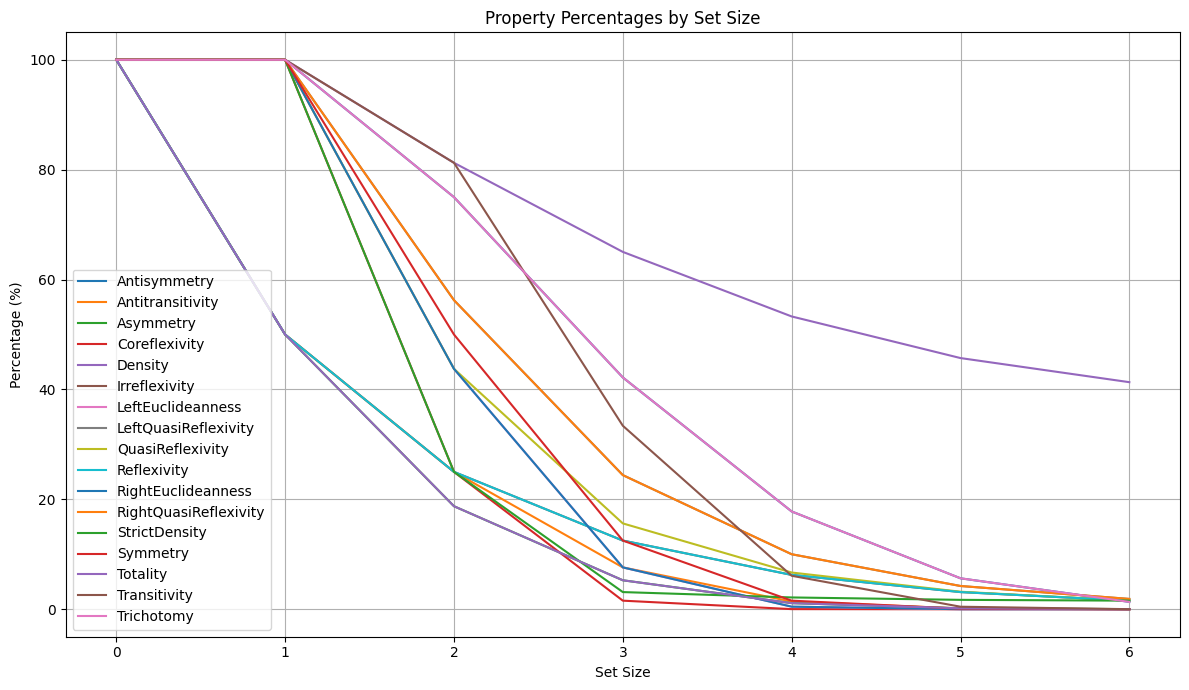

In [3]:
plt.figure(figsize=(12, 7))

for col in df.columns:
    if col.endswith("_Pct"):
        plt.plot(df["Set"], df[col], label=col.replace("_Pct", ""))

plt.xlabel("Set Size")
plt.ylabel("Percentage (%)")
plt.title("Property Percentages by Set Size")
plt.legend(loc="lower left")
plt.tight_layout()
plt.grid(True)
plt.show()

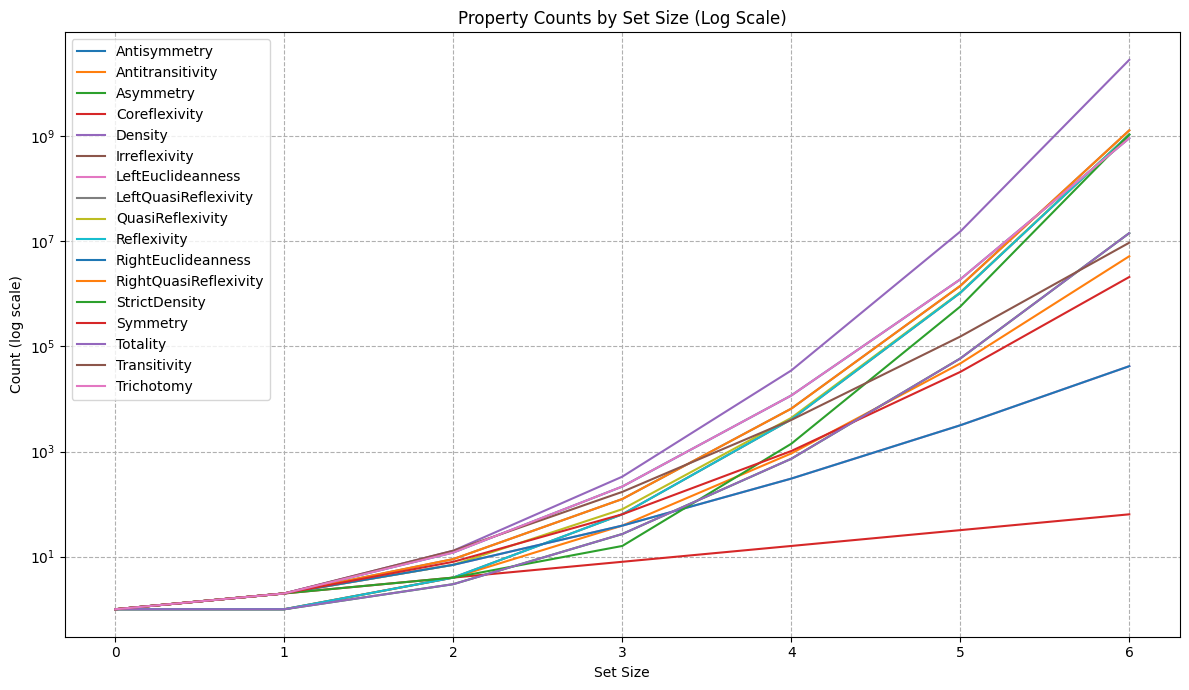

In [4]:
plt.figure(figsize=(12, 7))

for col in df.columns:
    if col.endswith("_Count"):
        label = col.replace("_Count", "")
        plt.plot(df["Set"], df[col], label=label)

plt.xlabel("Set Size")
plt.ylabel("Count (log scale)")
plt.title("Property Counts by Set Size (Log Scale)")
plt.yscale("log")
plt.legend(loc="upper left")
plt.tight_layout()
plt.grid(True, which="both", ls="--")
plt.show()

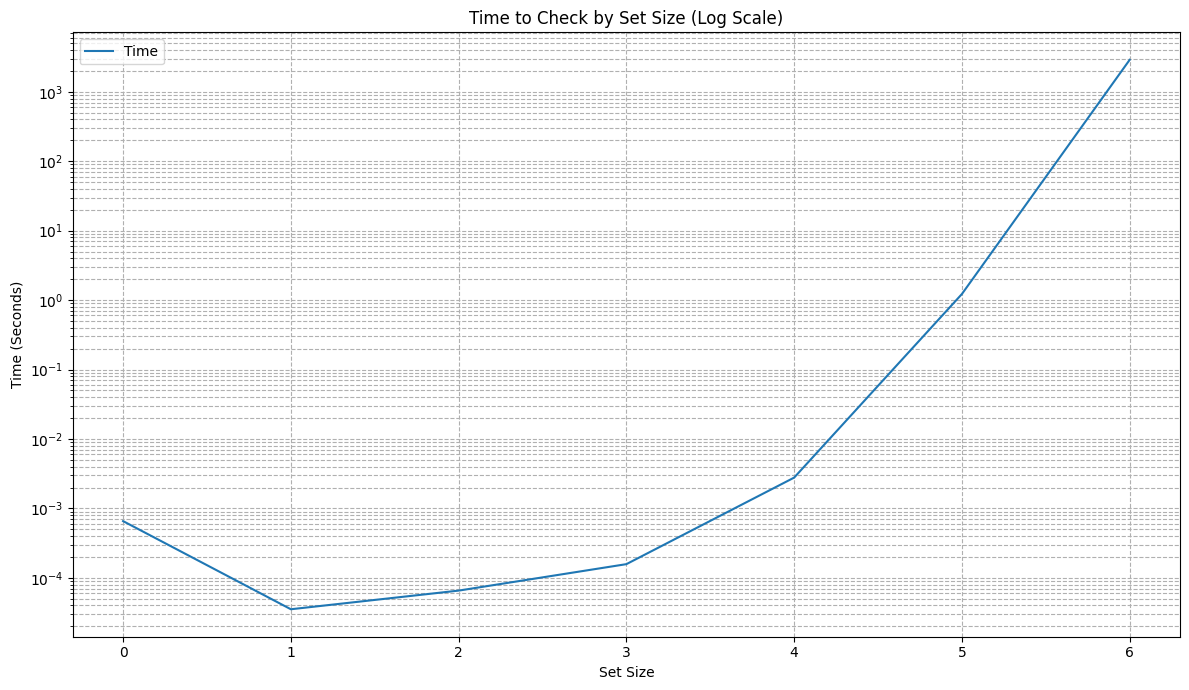

In [5]:
plt.figure(figsize=(12, 7))

plt.plot(df["Set"], df["Time"], label="Time")

plt.xlabel("Set Size")
plt.ylabel("Time (Seconds)")
plt.title("Time to Check by Set Size (Log Scale)")
plt.yscale("log")
plt.legend(loc="upper left")
plt.tight_layout()
plt.grid(True, which="both", ls="--")
plt.show()

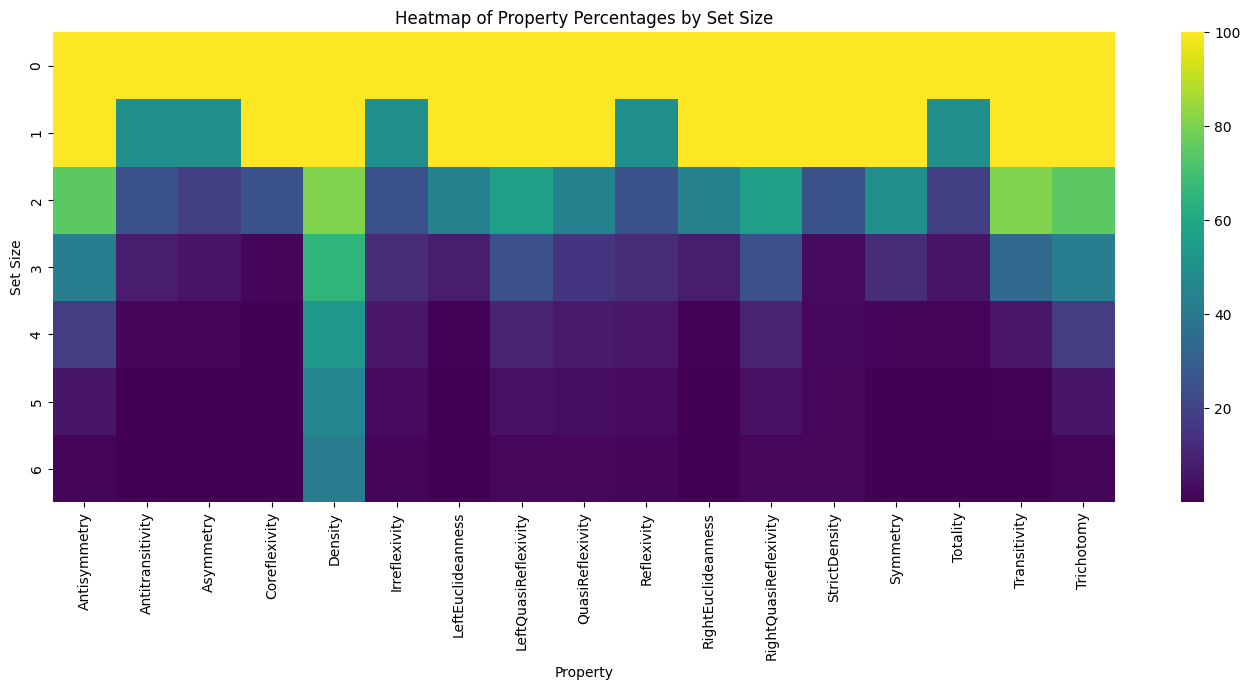

In [6]:
pct_cols = [col for col in df.columns if col.endswith("_Pct")]
heatmap_data = df[pct_cols].copy()
heatmap_data.columns = [col.replace("_Pct", "") for col in heatmap_data.columns]
heatmap_data.index = df["Set"]

plt.figure(figsize=(14, 7))
sns.heatmap(heatmap_data, annot=False, cmap="viridis")
plt.title("Heatmap of Property Percentages by Set Size")
plt.xlabel("Property")
plt.ylabel("Set Size")
plt.tight_layout()
plt.show()

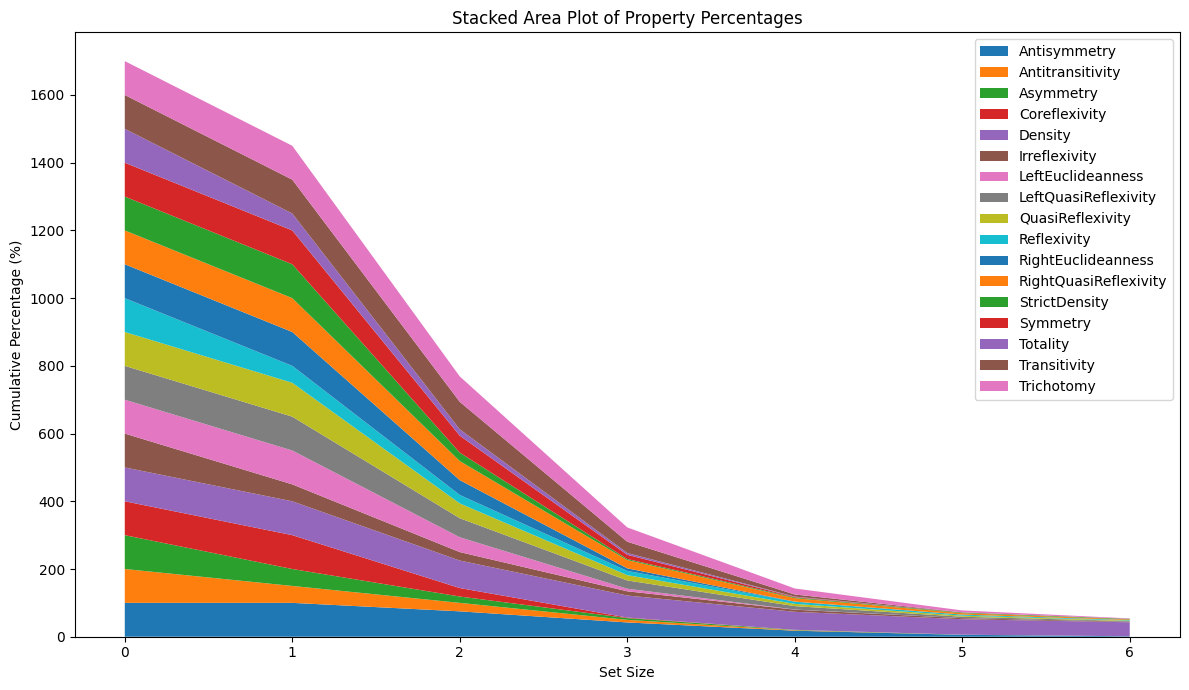

In [7]:
plt.figure(figsize=(12, 7))
plt.stackplot(df["Set"], [df[col] for col in pct_cols], labels=[col.replace("_Pct", "") for col in pct_cols])
plt.xlabel("Set Size")
plt.ylabel("Cumulative Percentage (%)")
plt.title("Stacked Area Plot of Property Percentages")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

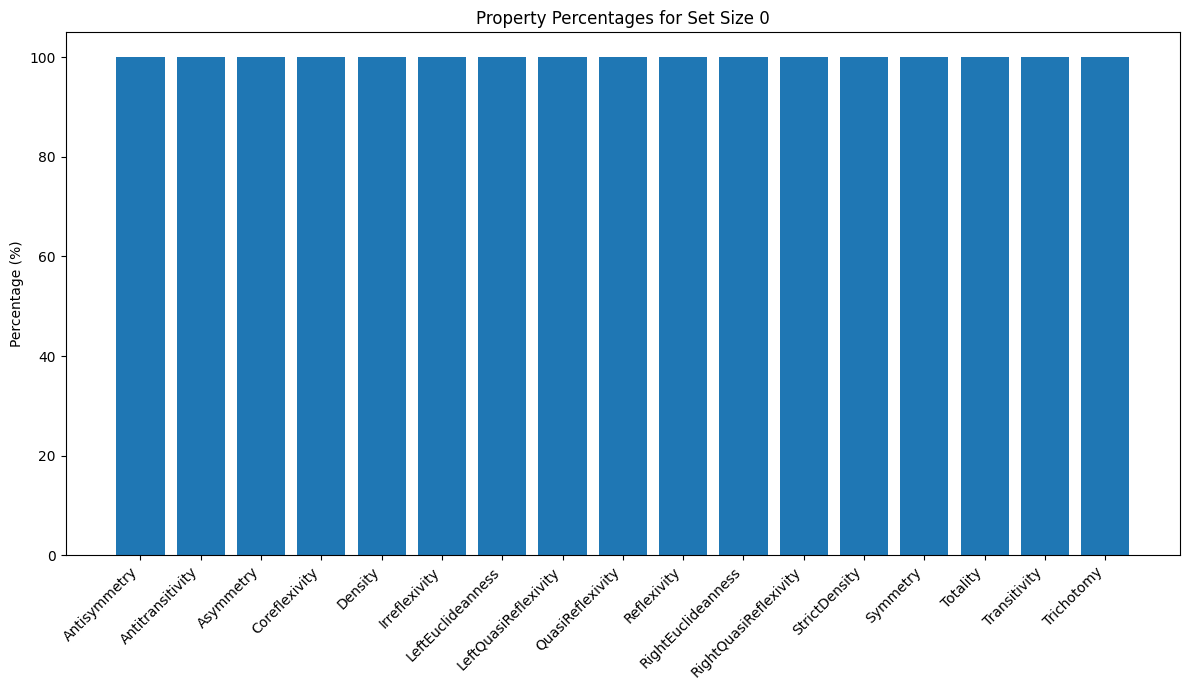

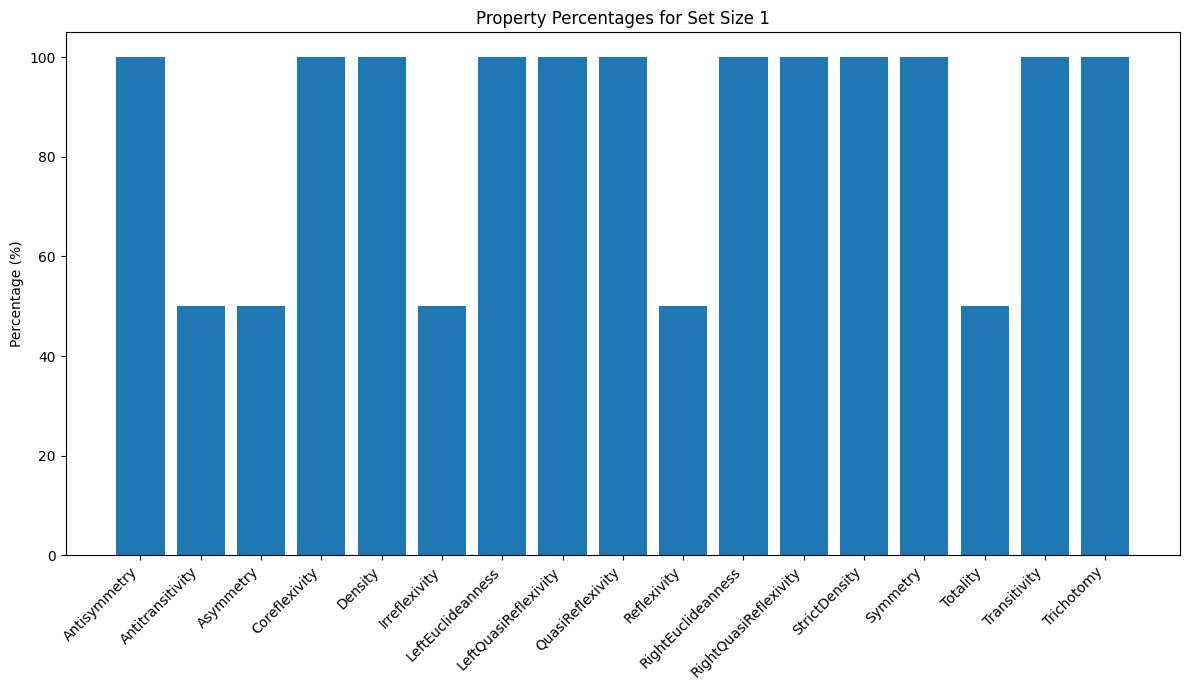

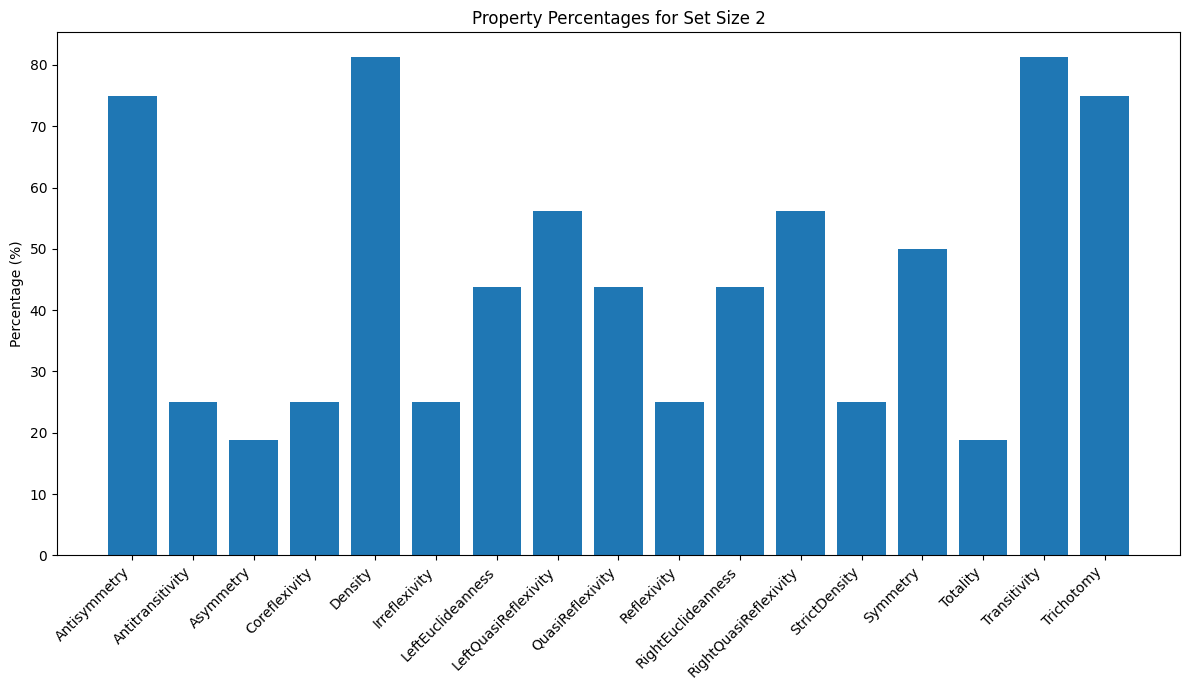

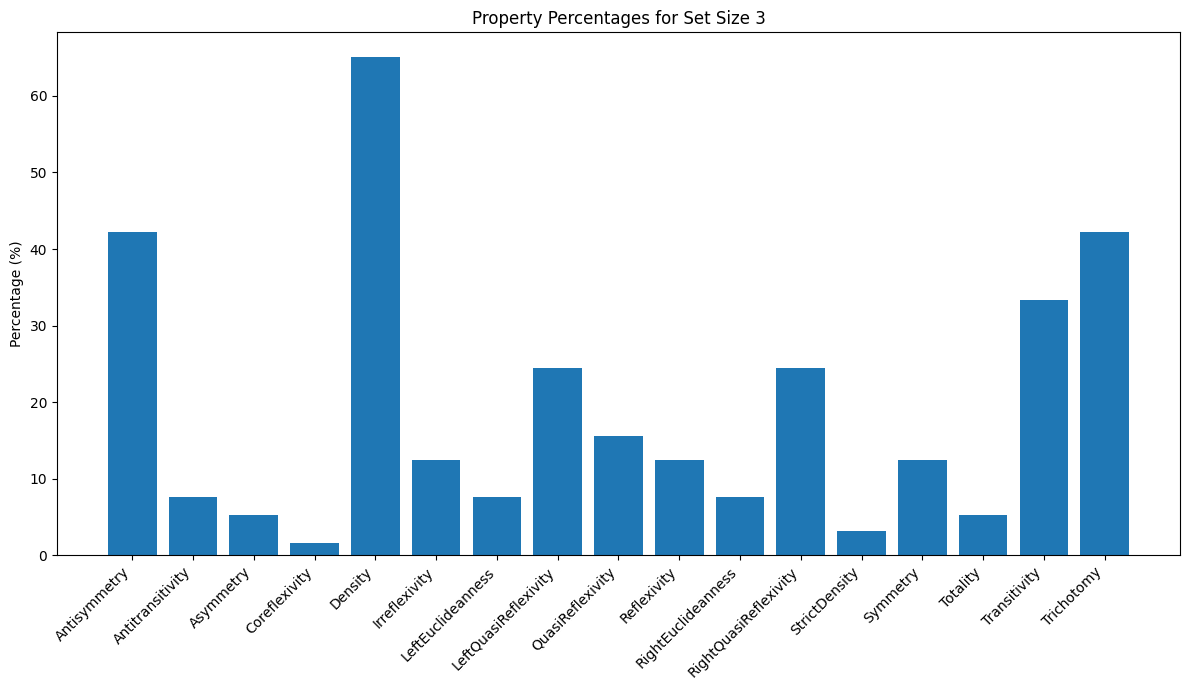

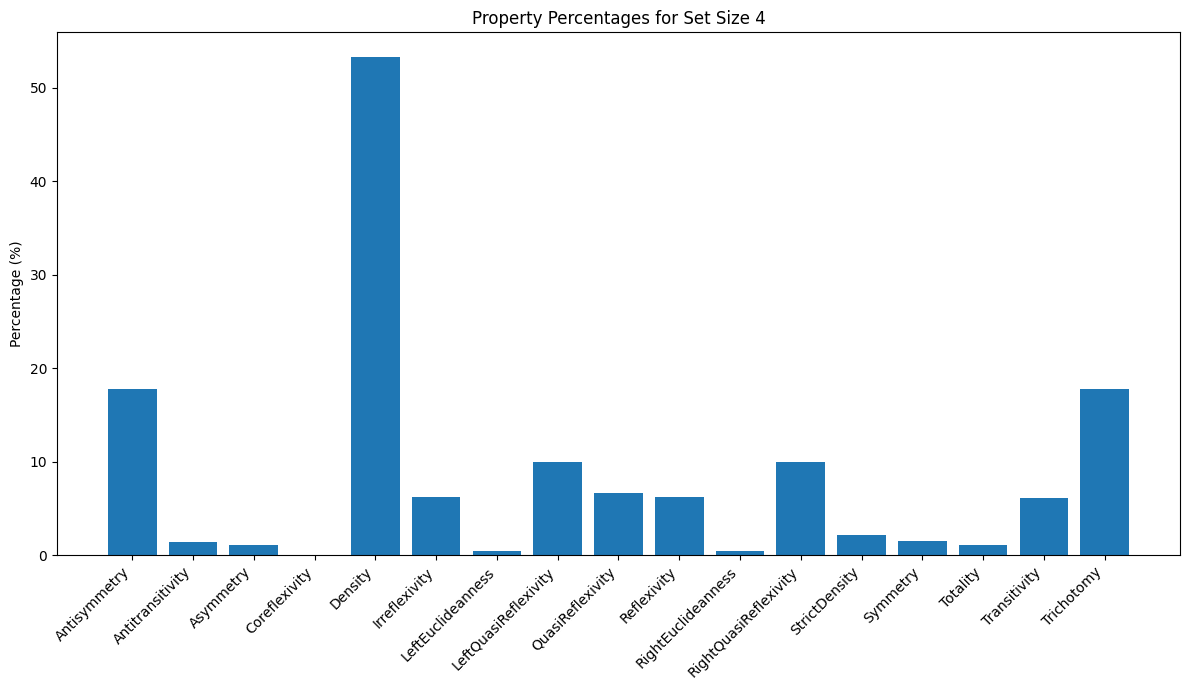

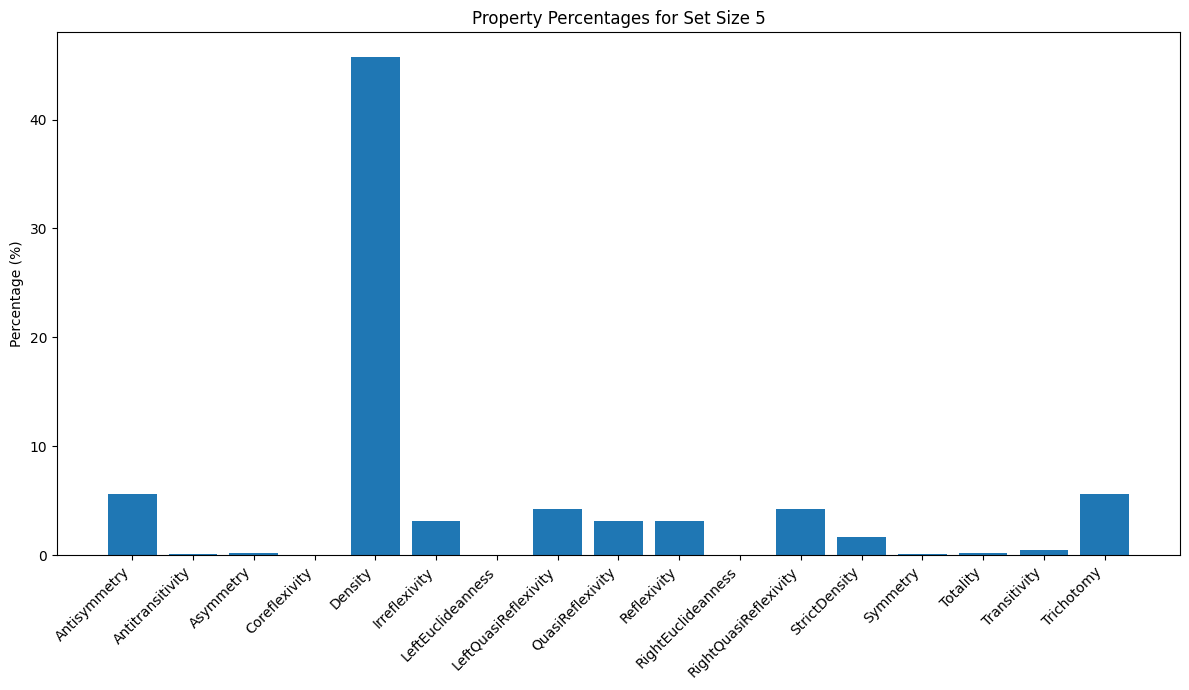

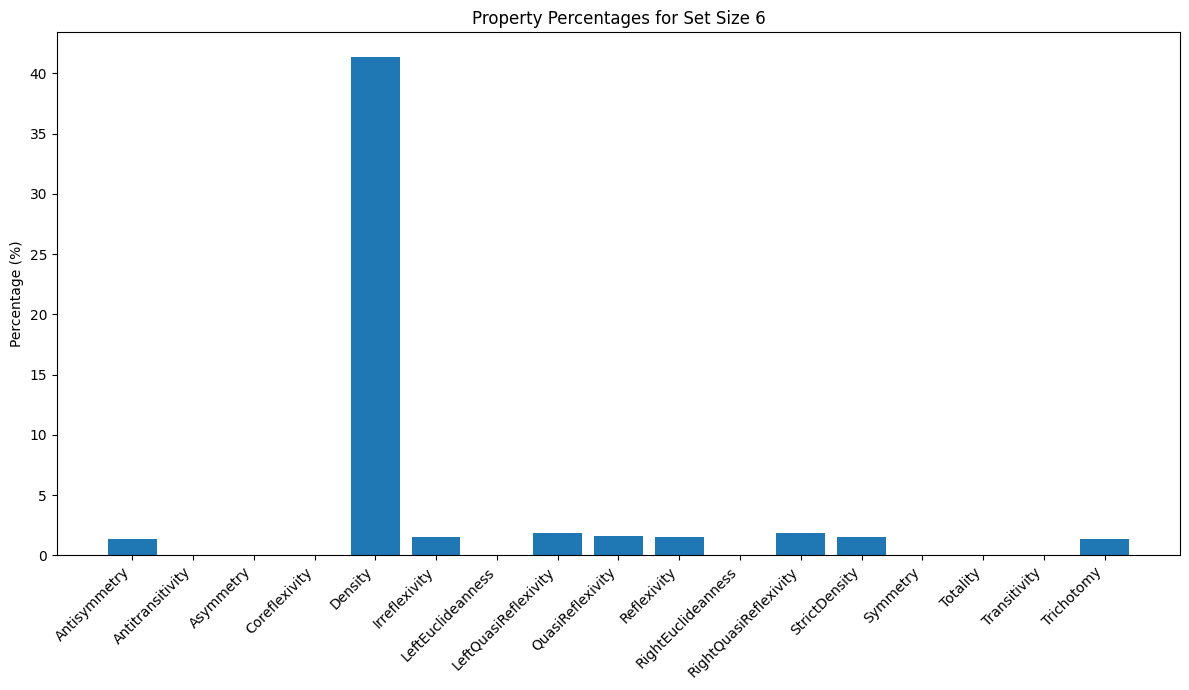

In [8]:
for set_size in df["Set"].unique():
    row = df[df["Set"] == set_size].iloc[0]
    plt.figure(figsize=(12, 7))
    plt.bar([col.replace("_Pct", "") for col in pct_cols], [row[col] for col in pct_cols])
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Percentage (%)")
    plt.title(f"Property Percentages for Set Size {set_size}")
    plt.tight_layout()
    plt.show()

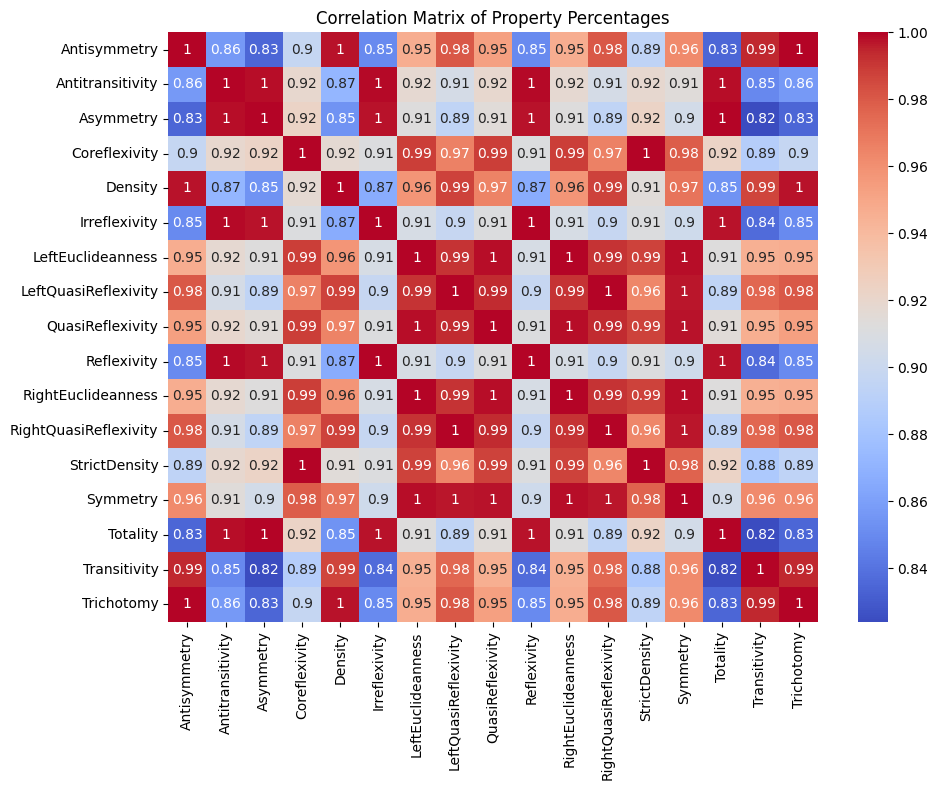

In [9]:
corr = df[pct_cols].corr()
corr.index = [col.replace("_Pct", "") for col in corr.index]
corr.columns = [col.replace("_Pct", "") for col in corr.columns]

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Property Percentages")
plt.tight_layout()
plt.show()